In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# Загрузка данных

In [2]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [3]:
data = pd.read_excel('data/data_ford_price.xlsx') 

# Трансформация признаков

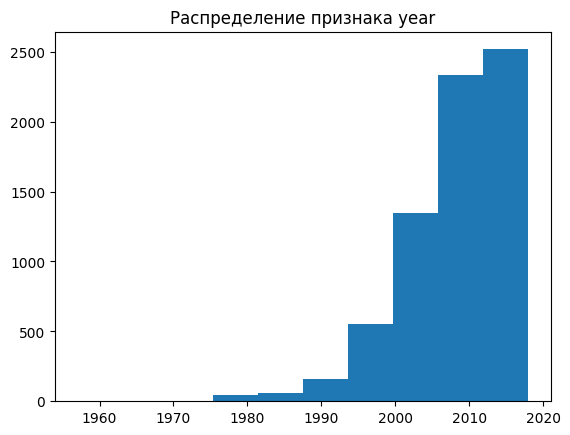

In [4]:
plt.hist(data.year)
plt.title('Распределение признака year');

## Квантильное преобразование

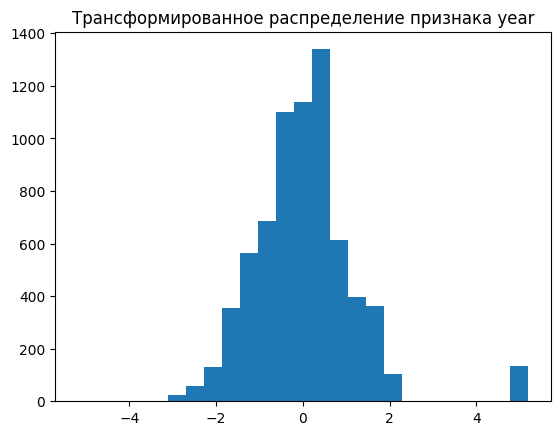

In [5]:
data_for_transform = data['year'].values.reshape((len(data),1))
 
quantile = QuantileTransformer(output_distribution='normal')
data_transformed = quantile.fit_transform(data_for_transform)
 
plt.hist(data_transformed, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

**Задание 6.1**

In [6]:
data_for_transf_condition = data['condition'].values.reshape((len(data), 1))

quantile_cond = QuantileTransformer(output_distribution='uniform')

data_transofrmed_cond = quantile_cond.fit_transform(data_for_transf_condition)

print(round(data_transofrmed_cond[0][0], 2))


0.96


In [7]:
data_for_transf_cylinders = data['cylinders'].values.reshape((len(data), 1))

quantile_cylinders = QuantileTransformer(output_distribution='uniform')

data_transofrmed_cylinders = quantile_cond.fit_transform(data_for_transf_cylinders)

print(round(data_transofrmed_cylinders[0][0], 2))

0.16


## Логарифмическое преобразование

Text(0.5, 1.0, 'Распределение признака price')

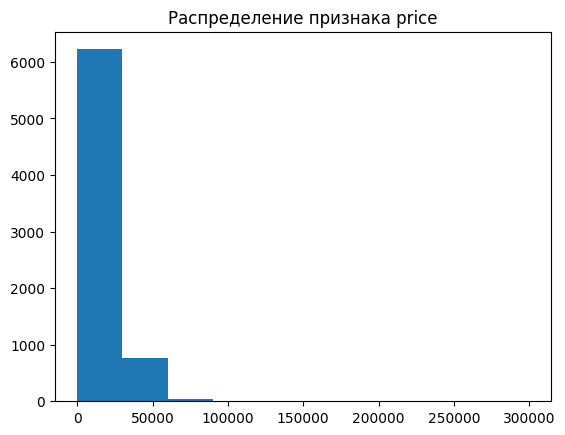

In [8]:
plt.hist(data.price)
plt.title('Распределение признака price')

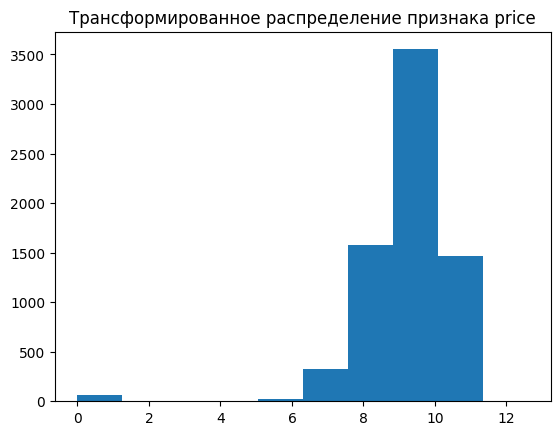

In [9]:
log_price = np.log(data['price'])
 
plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

In [10]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis = 1)
 
price_data.describe()

,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


**Задание 6.3**

In [38]:
print(round(log_price.iloc[-1], 2))



9.8


## Преобразование Бокса-Кокса

In [41]:
box_cox = PowerTransformer(method = 'box-cox')
 
data_box_cox = box_cox.fit_transform(data[['price', 'year']].values)
data_box_cox = pd.DataFrame(data_box_cox, columns = ['transformed_price', 'transformed_year'])

c:\Users\Юрий\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1120: UserWarning: The optimal lambda is 123.77792357708721, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)
c:\Users\Юрий\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1156: RuntimeWarning: overflow encountered in square
  temp **= 2
c:\Users\Юрий\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\Юрий\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count
c:\Users\Юрий\AppData\Local\Progra

**ПРИМЕЧАНИЕ**

При учебном коде не скалируется признак года (возникаем NaN). Вероятная причина в том, что слишком маленький разбег по значениям признака. 
Эта строка закомменчена. 

Пришлось воспользоваться методом из библиотеки скайпай. 

In [ ]:
# Предположим, что data — это DataFrame с колонками 'price' и 'year'
# Проверим наличие и корректность данных
if 'price' not in data.columns or 'year' not in data.columns:
    raise ValueError("В DataFrame отсутствуют колонки 'price' и 'year'")

# Проверим, есть ли отрицательные значения или нули
if (data[['price', 'year']] <= 0).any().any():
    raise ValueError("Для применения Box-Cox все значения должны быть положительными")

# Преобразование с помощью PowerTransformer
box_cox = PowerTransformer(method='box-cox')

test_data_year = data.copy()

from scipy.stats import boxcox

# test_data_year['year'] = test_data_year['year'] - 1000

data_box_cox_price = box_cox.fit_transform(data[['price']].values)
# data_box_cox_year = box_cox.fit_transform(test_data_year[['year']].values)
data_box_cox_year, _ = boxcox(test_data_year['year'])



# Создадим DataFrame с преобразованными данными
data_box_cox_price = pd.DataFrame(data_box_cox_price, columns=['transformed_price'])
data_box_cox_year = pd.DataFrame(data_box_cox_year, columns=['transformed_year'])

data_box_cox = pd.concat([data_box_cox_price, data_box_cox_year], axis=1)

c:\Users\Юрий\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1120: UserWarning: The optimal lambda is 123.77792357708721, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


In [27]:
test_data_year

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,1016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,1009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,1002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,1000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,1010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,1015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,1005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,1006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,1011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


In [13]:
data['year'].min()

1957

In [33]:
data_box_cox

,transformed_price,transformed_year
0,1.910471,1.639890e+304
1,0.270352,1.188089e+304
2,-1.369721,8.597946e+303
3,-1.718754,7.837449e+303
4,0.132932,1.244153e+304
...,...,...
7012,0.780988,1.566208e+304
7013,-0.733027,9.877554e+303
7014,-0.238492,1.034461e+304
7015,-0.145148,1.302833e+304


In [65]:
data[['price']].values

array([[43900],
       [15490],
       [ 2495],
       ...,
       [ 9999],
       [10900],
       [18000]], dtype=int64)

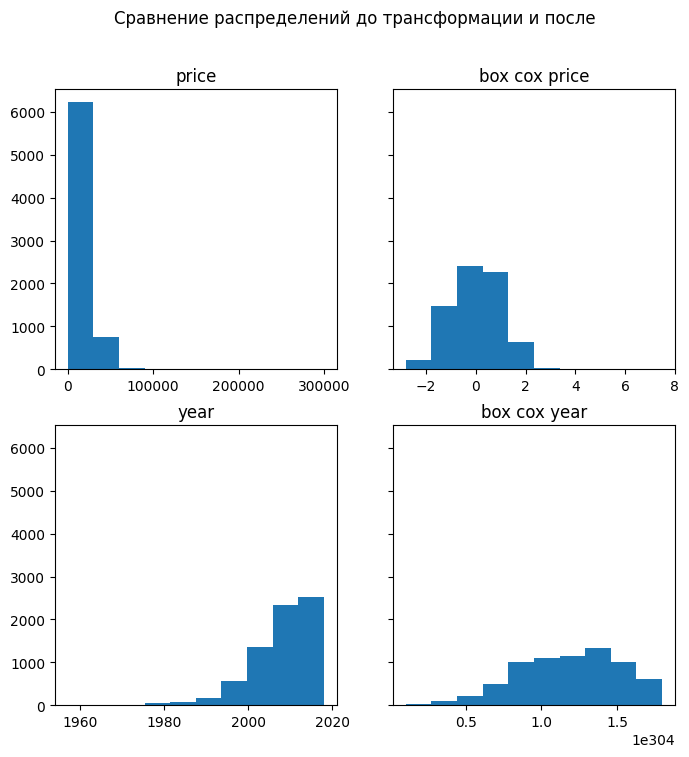

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), sharey=True)
axs[0][0].hist(data['price'])
axs[1][0].hist(data['year'])
axs[0][1].hist(data_box_cox['transformed_price'])
axs[1][1].hist(data_box_cox['transformed_year'])

axs[0][0].set(title='price')
axs[0][1].set(title='box cox price')

axs[1][0].set(title='year')
axs[1][1].set(title='box cox year')

fig.suptitle('Сравнение распределений до трансформации и после')

plt.show()